In [3]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import timedelta, time
import matplotlib.dates as mdates

matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 15)

In [4]:
df = pd.read_csv("./log.csv")
df['timestamp'] = df['timestamp'].apply(lambda x: pd.to_datetime(int(x), unit='s') - timedelta(minutes=60*4))
df = df.set_index('timestamp')
df = df[['ambient (ground)', 'tank (left)', 'tank (right)', 'line (inner)', 'line (outer)',  'ambient (tank)']]
df.head()

,ambient (ground),tank (left),tank (right),line (inner),line (outer),ambient (tank)
timestamp,,,,,,
2019-07-27 20:22:19,523,600,608,480,525,535
2019-07-27 20:22:20,523,600,607,480,525,535
2019-07-27 20:22:50,522,599,607,481,525,539
2019-07-27 20:22:51,522,600,607,480,525,539
2019-07-27 20:22:52,522,600,607,481,524,539


In [5]:
time(hour=10, minute=5)

datetime.time(10, 5)

In [6]:
manual_temps = {
    '20:31': {
        'ambient (ground)': 25.3,
        'tank (right)': 33.7,
        'tank (left)': 32.9,
        'tank (duck)': 35.0,
    },
    '20:49': {
        'tank (psi)': 15.0,
    },
    '21:27': {
        'ambient (ground)': 24.8,
        'tank (left)': 34.1,
        'tank (right)': 34.8,
        'tank (duck)': 35.0,
        'tank (psi)': 15.0,
    },
    '22:15': {
        'ambient (ground)': 24.7,
        'tank (left)': 34.0,
        'tank (right)': 34.2,
        'tank (psi)': 7.5,
    },
    '22:30': {
        'ambient (ground)': 24.5,
        'tank (left)': 34.4,
        'tank (right)': 34.6,
        'tank (psi)': 0,
    },
    '22:57': {
        'ambient (ground)': 23.6,
        'tank (left)': 34.7,
        'tank (right)': 35.0,
        'tank (psi)': 0,
    },
    '23:21': {
        'tank (duck)': 31.0,
    }
}

mt_df = pd.DataFrame(map(lambda (t, temps): dict(
    timestamp=pd.to_datetime('2019-07-27 ' + t + ':00'),
    **temps
), manual_temps.iteritems())).set_index('timestamp').sort_index()
mt_df = mt_df[['ambient (ground)', 'tank (left)', 'tank (right)', 'tank (duck)', 'tank (psi)']]
mt_df

,ambient (ground),tank (left),tank (right),tank (duck),tank (psi)
timestamp,,,,,
2019-07-27 20:31:00,25.3,32.9,33.7,35.0,NaN
2019-07-27 20:49:00,NaN,NaN,NaN,NaN,15.0
2019-07-27 21:27:00,24.8,34.1,34.8,35.0,15.0
2019-07-27 22:15:00,24.7,34.0,34.2,NaN,7.5
2019-07-27 22:30:00,24.5,34.4,34.6,NaN,0.0
2019-07-27 22:57:00,23.6,34.7,35.0,NaN,0.0
2019-07-27 23:21:00,NaN,NaN,NaN,31.0,NaN


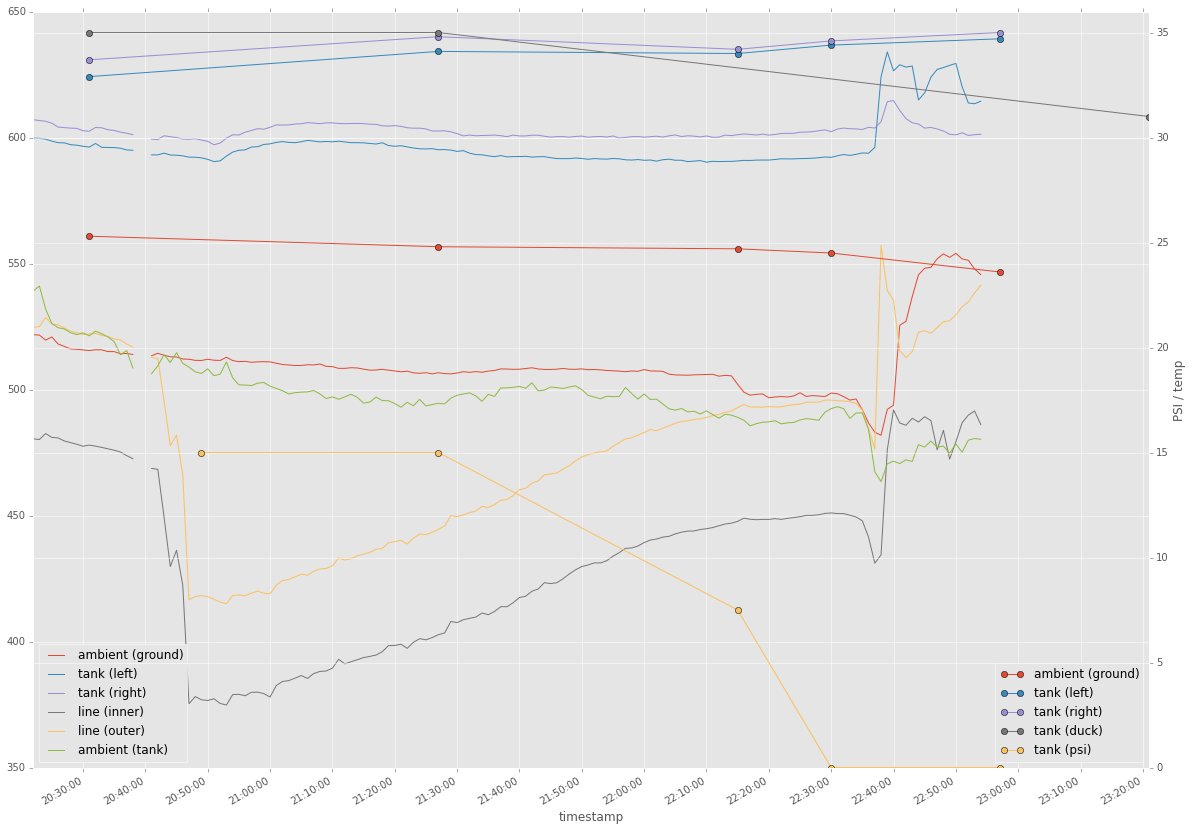

In [8]:
to_plot = df.resample('60s').mean()
ax = to_plot.plot(x_compat=True)
ax.legend(loc='lower left')
ax2 = ax.twinx()
for col in mt_df.columns:
    col_points = mt_df[col].dropna()
    ax2.plot(col_points.index, col_points, label=col, marker='o')
ax2.set_ylabel('PSI / temp')
ax2.set_ylim((0, 36))
ax2.legend(loc='lower right')
xticks = pd.date_range(mt_df.index.min() - timedelta(minutes=1), mt_df.index.max(), freq='600s')
plt.xticks(xticks, xticks.time);

# Reading the Graph
The left axis represents arbitrary resistance values coming directly from the thermisters. I assume they are linear, but probably can't be compared to each other (the ambient sensors were a different model from the line and tank sensors).

The right axis shows the temperature as read by the duck and laser thermometer, along with the tank PSI (as read from the gauge).

## Interpriation

It's interesting to note that the water temperature ("tank (left / right)") stayed pretty much constant.

The "line (inner/outer)" sensors show clearly when the propane was started (about 20:45). It's unclear why there was the rapid drop if line temperature about 22:45, but that seems to correlate with the propane running out.

I suspect the spike in "ambient (ground)" temp at 22:40

